In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
csv_file = './academic_performance_data.csv'
dataset = pd.read_csv(csv_file)
df = pd.DataFrame(dataset)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   student_name  358 non-null    object 
 1   roll_num      358 non-null    int64  
 2   attendance    358 non-null    int64  
 3   gender        358 non-null    object 
 4   sem1_marks    352 non-null    float64
 5   sem2_marks    352 non-null    float64
 6   cgpa          358 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.7+ KB


## Replacing null marks with mean marks

In [4]:
sem1_mean_marks = df["sem1_marks"].mean()
sem2_mean_marks = df["sem2_marks"].mean()

df["sem1_marks"].fillna(sem1_mean_marks,inplace=True)
df["sem2_marks"].fillna(sem2_mean_marks,inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   student_name  358 non-null    object 
 1   roll_num      358 non-null    int64  
 2   attendance    358 non-null    int64  
 3   gender        358 non-null    object 
 4   sem1_marks    358 non-null    float64
 5   sem2_marks    358 non-null    float64
 6   cgpa          358 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.7+ KB


## Finding and fixing outliers

In [5]:
df.describe()

,roll_num,attendance,sem1_marks,sem2_marks,cgpa
count,358.000000,358.000000,358.000000,358.000000,358.000000
mean,248.114525,50.522346,304.866477,323.877841,5.356285
std,139.388222,29.461047,178.426398,173.375790,2.139807
min,1.000000,0.000000,-15.000000,-125.000000,0.090000
25%,125.250000,25.250000,159.000000,187.500000,3.912500
50%,241.500000,50.000000,304.866477,323.877841,5.250000
75%,381.750000,77.000000,459.500000,461.500000,6.705000
max,471.000000,99.000000,650.000000,720.000000,15.000000


In [6]:
def plotvariable(df, variable):
  plt.figure(figsize=(16,4))
  #histogram
  plt.subplot(1,2,1)
  plt.hist(df[variable],alpha = .5)

  #boxplot
  plt.subplot(1,2,2)
  plt.boxplot(df[variable])
  plt.show()



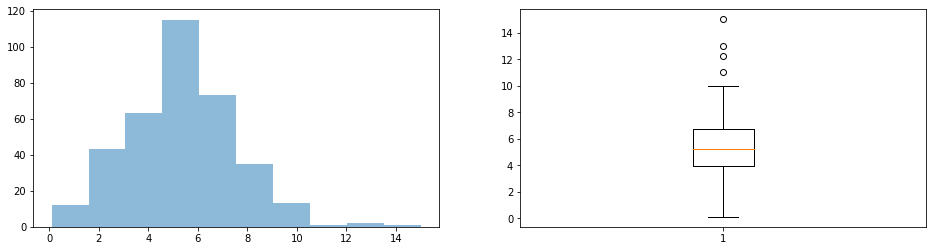

In [7]:
plotvariable(df,"cgpa")

In [8]:
Q1 = df["cgpa"].quantile(0.25)
Q3 = df["cgpa"].quantile(0.75)
Q1,Q3

(3.9125, 6.705)

In [9]:
IQR = Q3 - Q1
IQR

2.7925

In [10]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit

(-0.27624999999999966, 10.89375)

In [11]:
df_no_outlier = df[(df["cgpa"] > lower_limit) & (df["cgpa"] < upper_limit)]

In [12]:
df_no_outlier.describe()

,roll_num,attendance,sem1_marks,sem2_marks,cgpa
count,354.000000,354.000000,354.000000,354.000000,354.000000
mean,246.245763,50.437853,307.161579,324.031828,5.272175
std,138.969636,29.449295,177.804920,173.139628,1.992907
min,1.000000,0.000000,-15.000000,-125.000000,0.090000
25%,124.250000,25.250000,162.750000,189.000000,3.885000
50%,239.500000,49.500000,304.866477,323.877841,5.245000
75%,379.750000,77.000000,460.000000,461.500000,6.657500
max,470.000000,99.000000,650.000000,720.000000,9.940000


## Data transformation

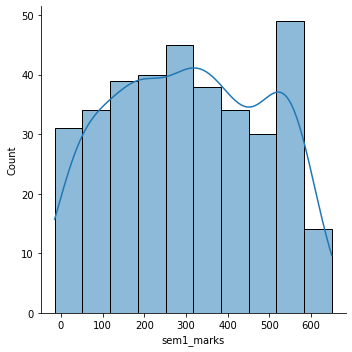

In [13]:
sns.displot(df_no_outlier["sem1_marks"],kde=True)

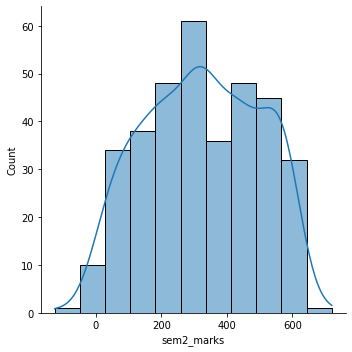

In [14]:
sns.displot(df_no_outlier["sem2_marks"],kde=True)

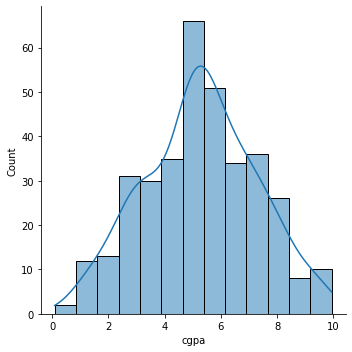

In [15]:
sns.displot(df_no_outlier["cgpa"],kde=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler
df_min_max_scaled = df_no_outlier.copy()
  
scaler = MinMaxScaler()

numeric_cols = ["sem1_marks","sem2_marks","cgpa"]
 
df_scaled = scaler.fit_transform(df_no_outlier[numeric_cols].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)
 
print("Scaled Dataset Using MinMaxScaler")
df_scaled.describe()

Scaled Dataset Using MinMaxScaler


,sem1_marks,sem2_marks,cgpa
count,354.000000,354.000000,354.000000
mean,0.484454,0.531399,0.526109
std,0.267376,0.204899,0.202326
min,0.000000,0.000000,0.000000
25%,0.267293,0.371598,0.385279
50%,0.481002,0.531216,0.523350
75%,0.714286,0.694083,0.666751
max,1.000000,1.000000,1.000000
